In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')

credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [4]:
df_credit = credit.drop('Customer Key', axis=1)
df_credit.head(10)

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,100000,2,1,1,0
1,2,50000,3,0,10,9
2,3,50000,7,1,3,4
3,4,30000,5,1,1,4
4,5,100000,6,0,12,3
5,6,20000,3,0,1,8
6,7,100000,5,0,11,2
7,8,15000,3,0,1,1
8,9,5000,2,0,2,2
9,10,3000,4,0,1,7


<Axes: >

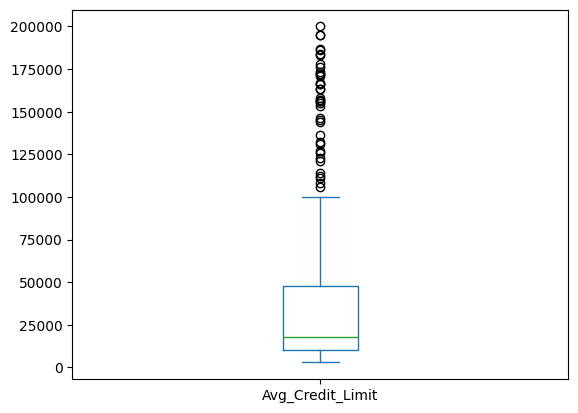

In [5]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah baris DataFrame sebelum dibuang outliner 660
Jumlah baris DataFrame sesudah dibuang outliner 621


<Axes: >

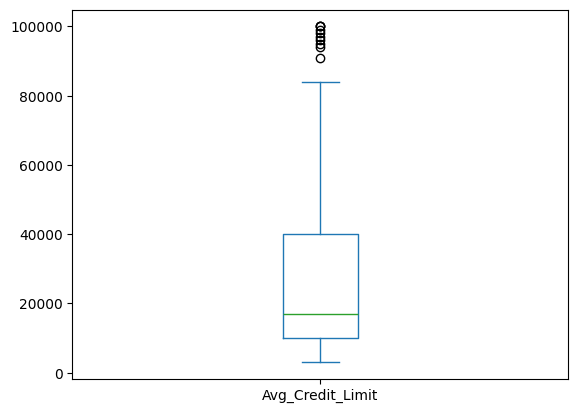

In [6]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(data_frame, kolom_outlier):
        q1 = data_frame[kolom_outlier].quantile(0.25)
        q3 = data_frame[kolom_outlier].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)
        
        return data_frame.loc[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah baris DataFrame sebelum dibuang outliner", df_credit.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outliner", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

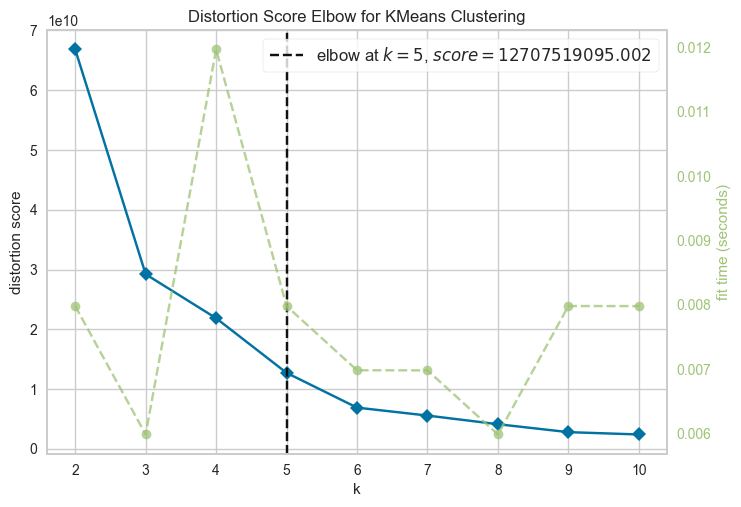

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=94)
vis = KElbowVisualizer(kMeansC,k=(2,11))

vis.fit(data_bersih)

vis.show()

SilhouetteScore K-Means for  2  clusters : 0.7252442392486933
SilhouetteScore K-Means for  3  clusters : 0.7074243621289421
SilhouetteScore K-Means for  4  clusters : 0.5851457390315106
SilhouetteScore K-Means for  5  clusters : 0.5971508833318003
SilhouetteScore K-Means for  6  clusters : 0.615948556327946
SilhouetteScore K-Means for  7  clusters : 0.5949942254859371
SilhouetteScore K-Means for  8  clusters : 0.5851514878218098
SilhouetteScore K-Means for  9  clusters : 0.6094119535336313
SilhouetteScore K-Means for  10  clusters : 0.5952511872102337


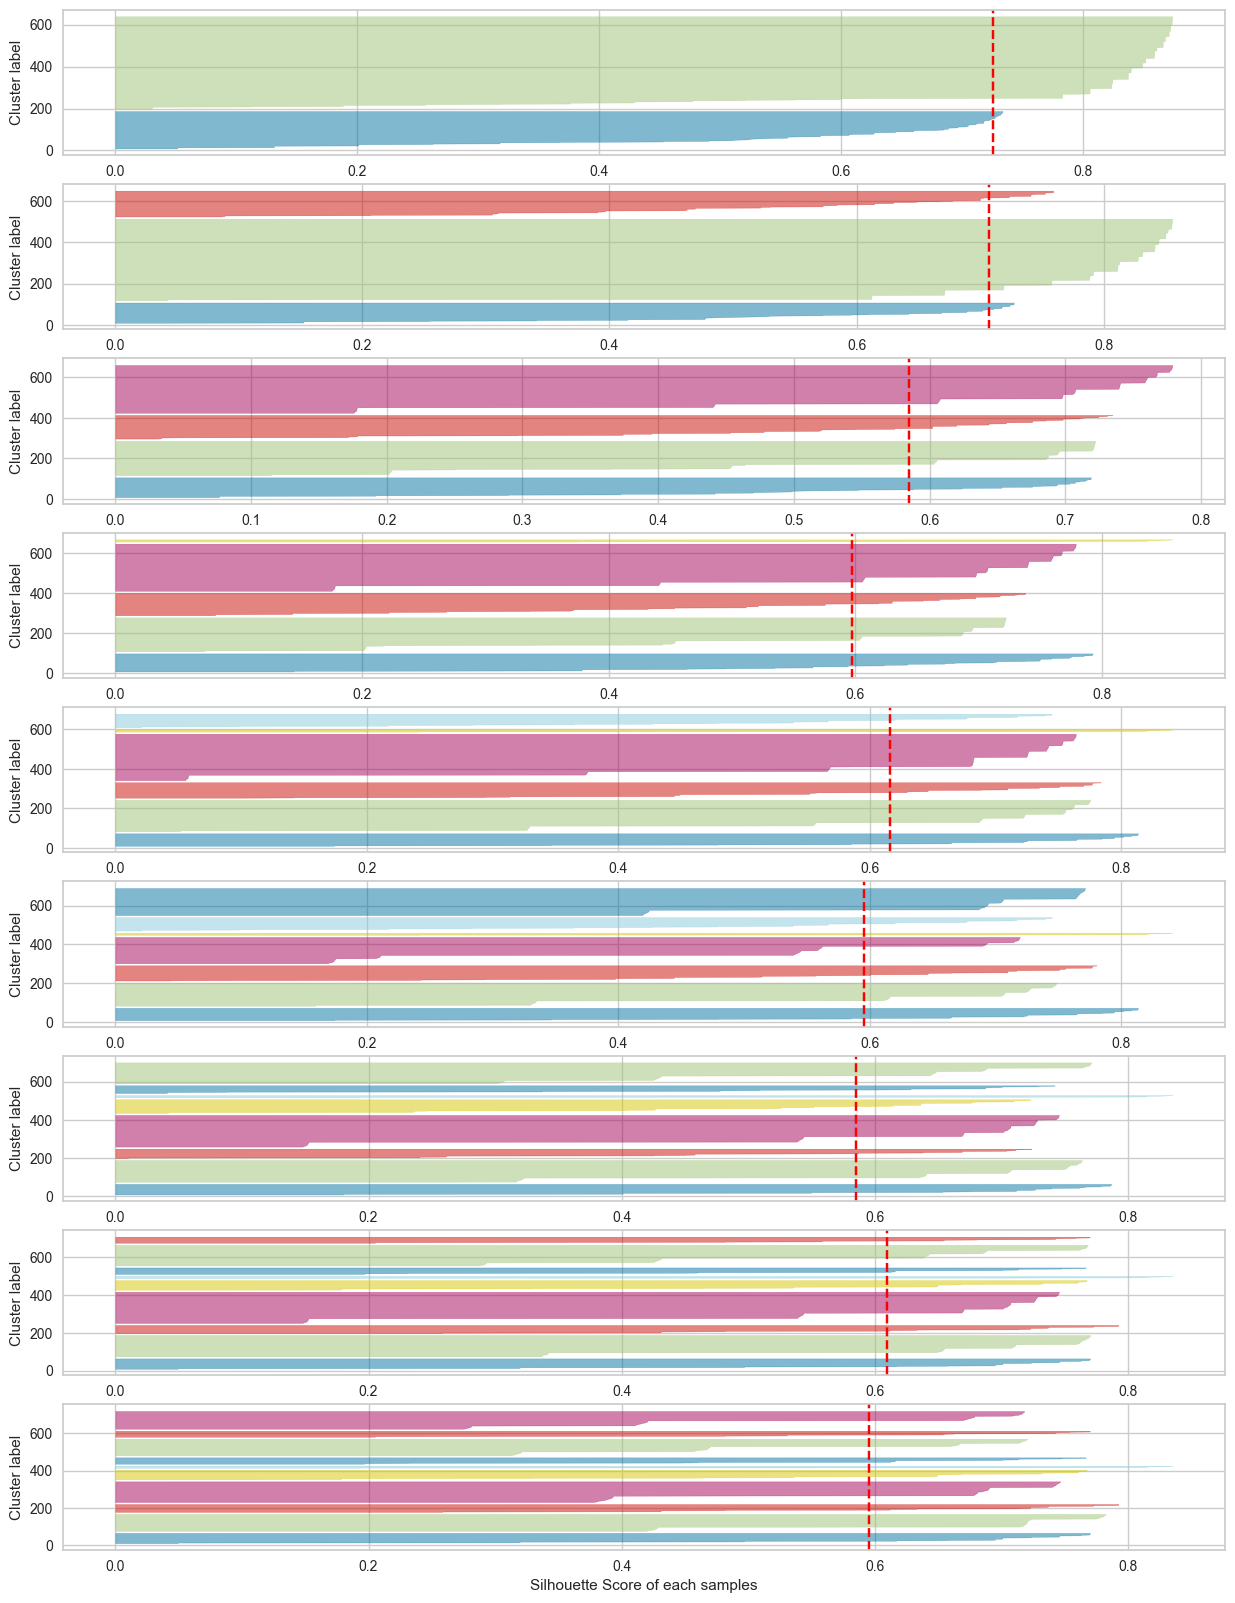

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=94)

    KM_clusters=kMeansC.fit_predict(data_bersih)
    print("SilhouetteScore K-Means for ", k, " clusters :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [11]:
data_bersih.columns

Index(['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

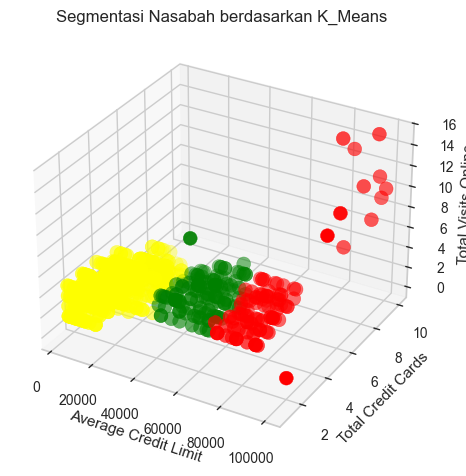

Silhouette Score K_Means: 0.707


In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=94)
K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit' ], data_bersih['Total_Credit_Cards' ], data_bersih['Total_visits_online' ], c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K_Means' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K_Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

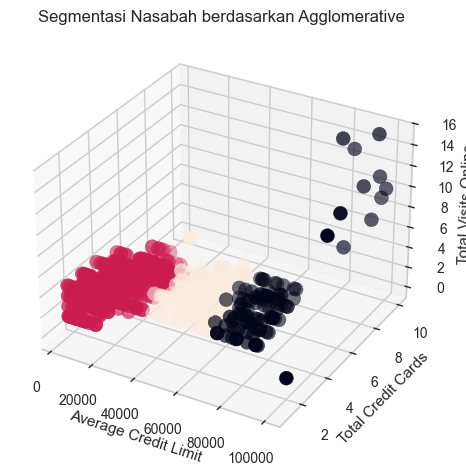

Silhouette Score K_Means: 0.705


In [18]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward' )

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d' )

ax. scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online' ], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K_Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

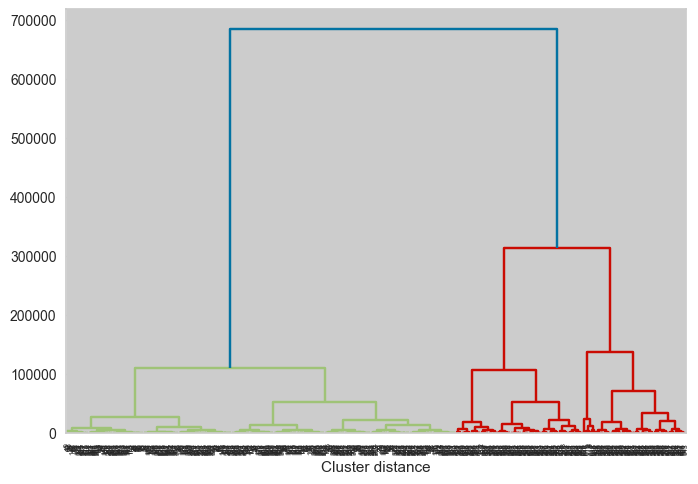

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.xlabel("Cluster distance")
plt.show()

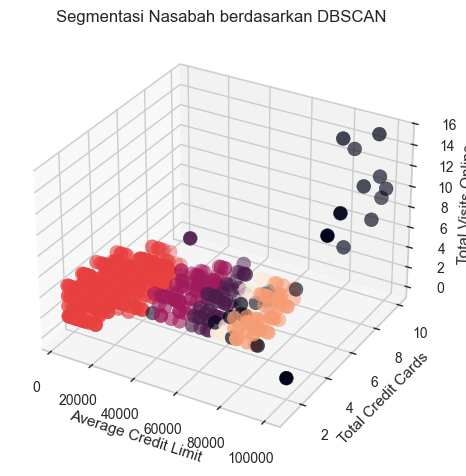

Silhouette Score K_Means: 0.656


In [20]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d' )

ax. scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online' ], c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K_Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [21]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
